**This is a heart disease prediction project**

* Problem Defination
* data
* evaluation
* Features
* Modeling
* Experimentation

In [29]:
#Standard Libs
%matplotlib inline 
#<to show the plot in this learning notebook file as well (inline)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Modeling Libs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation Libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Data

In [30]:
df = pd.read_csv(r'C:\Users\Dharun prasanth\OneDrive\Documents\Project\Notebook\data\heart.csv')
df.shape

(1025, 14)

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Features
What features are important, what column means what

* 1-age (Age of the patient in years)
* 2-sex (Male/Female) (1/0)
* 3-cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])(0~3)
* 4-trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)) 
* 5-chol (serum cholesterol in mg/dl)
* 6-fbs (if fasting blood sugar > 120 mg/dl) (1/0)
* 7-restecg (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy] (0~2)
* 8-thalach: maximum heart rate achieved 
* 9-exang: exercise-induced angina (True/ False) (1/0)
* 10-oldpeak: ST depression induced by exercise relative to rest
* 11-slope: the slope of the peak exercise ST segment  (downsloping/flat/upsloping)
* 12-ca: number of major vessels (0-3) colored by fluoroscopy
* 13-thal: [normal; fixed defect; reversible defect] (1~3)
* 14-target: yes or no (1/0)

# Exploratory Data Analysis

* 1- What Problem i am going to solve
* 2- What kind of data i have
* 3- Does this data have missing values
* 4- Are their any outliers, spporious vectors
* 5- Can i add or remove some features

In [33]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

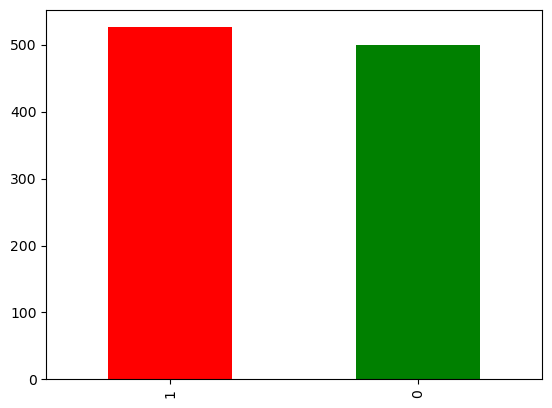

In [34]:
df.target.value_counts().plot(kind='bar',color=['red','green']);

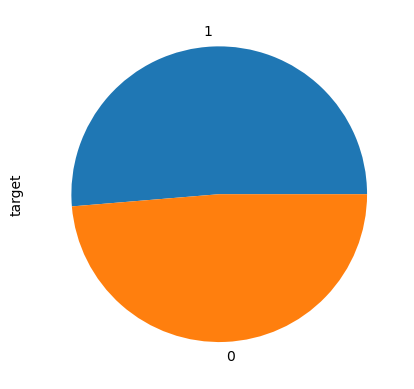

In [35]:
df.target.value_counts().plot(kind='pie');

In [36]:
# is there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [39]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


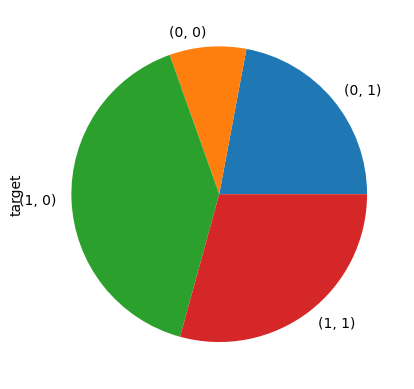

In [40]:
df.groupby(["sex"])["target"].value_counts().plot(kind="pie");

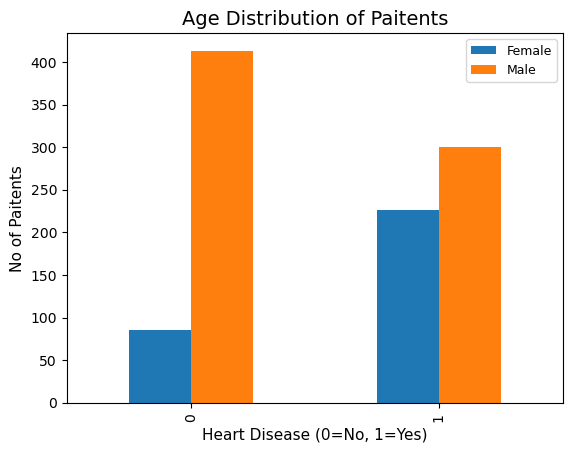

In [41]:
pd.crosstab(df.target, df.sex).plot(kind='bar');
plt.xlabel('Heart Disease (0=No, 1=Yes)', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Age Distribution of Paitents', fontsize = 14)
plt.legend(['Female','Male'], fontsize = 9);

### Age vs Heart Rate

In [42]:
df.thalach.value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

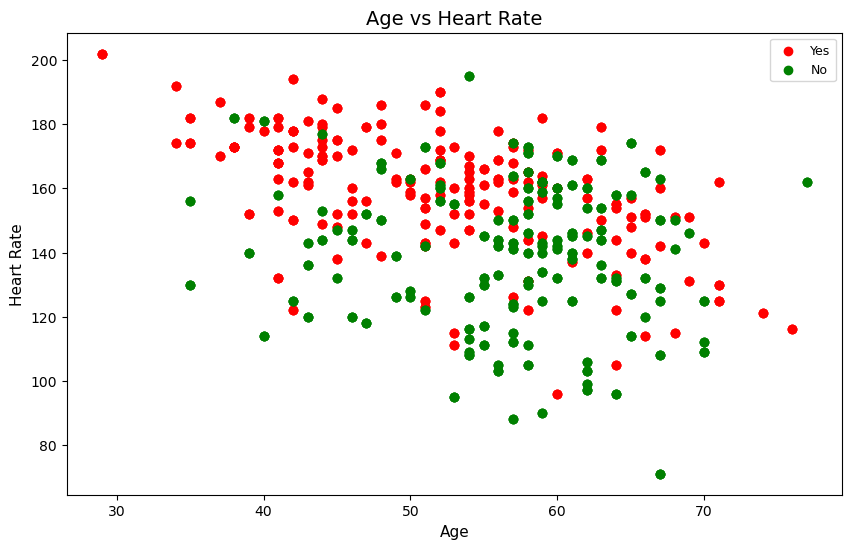

In [43]:
# Finding pattern using scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='green')
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Heart Rate', fontsize = 11)
plt.title('Age vs Heart Rate', fontsize = 14)
plt.legend(['Yes','No'], fontsize = 9);

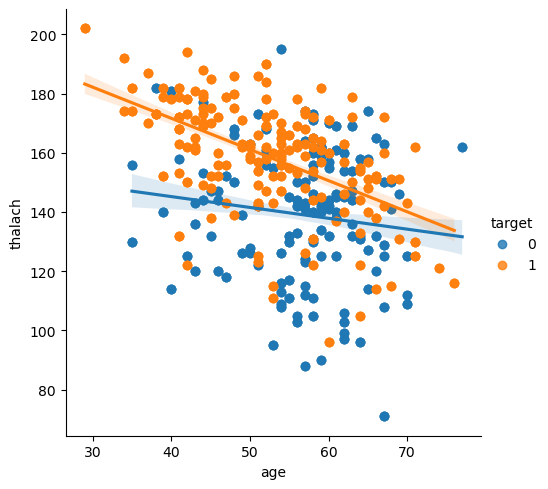

In [44]:
# alternately use this to see pattern
sns.lmplot(data=df, x='age', y='thalach', hue='target');

### Age Distribution

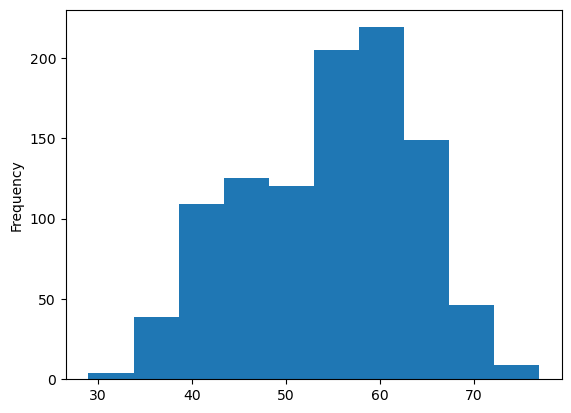

In [45]:
# Create histogram to see age distribution
df.age.plot.hist();

data is sligtly skewed toward high age

### Chest paint type and Target relation

In [46]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])(0~3)

In [47]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


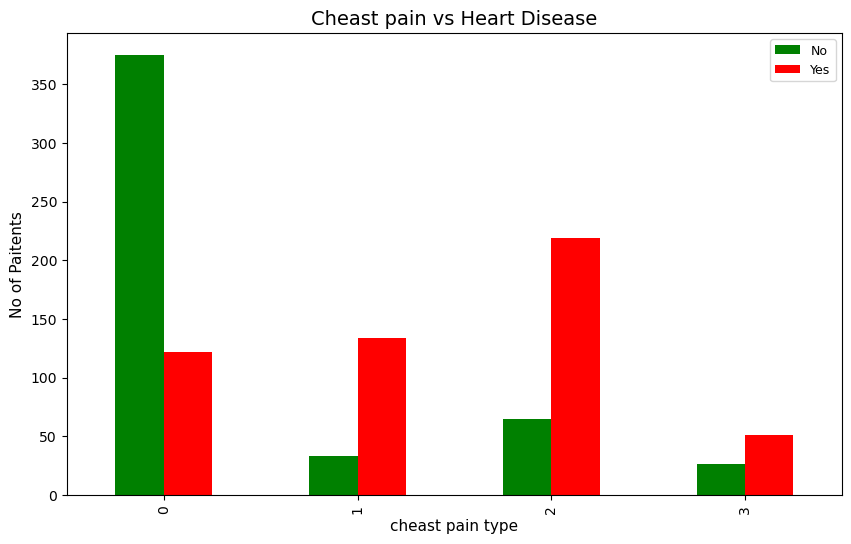

In [48]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['green', 'red']);
plt.xlabel('cheast pain type', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Cheast pain vs Heart Disease', fontsize = 14)
plt.legend(['No','Yes'], fontsize = 9);

### Correlation Matrix

In [49]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


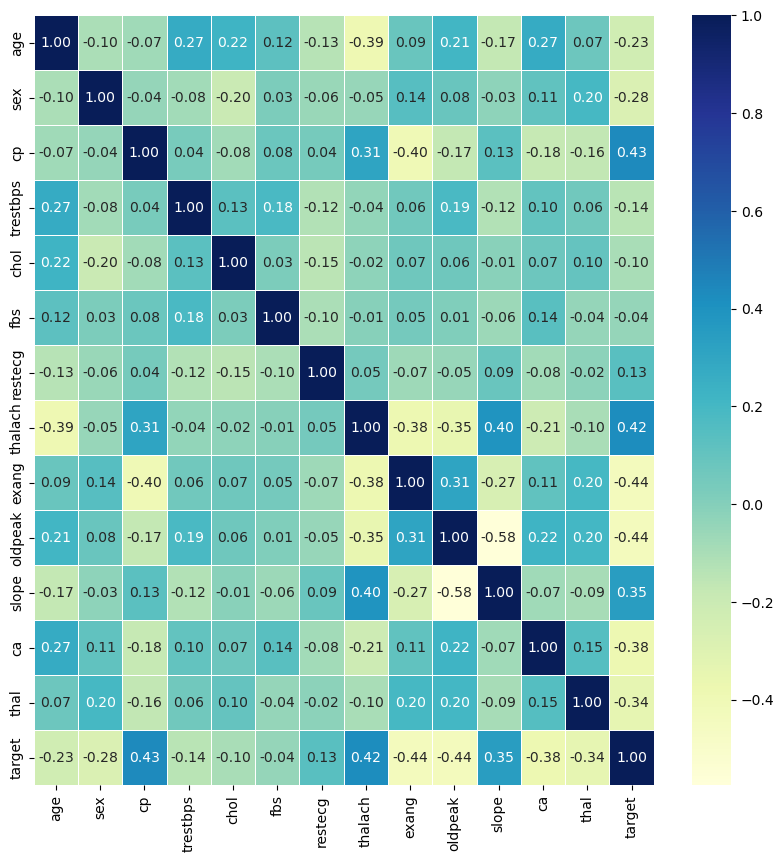

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, linewidth=0.5, fmt='0.2f', cmap='YlGnBu');

# Modelling 

In [51]:
# Split data in Features and Label
X = df.drop('target', axis=1)
y = df.target

In [52]:
# split data in respective test and train veriables
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Choosing Model
* 1- KNeighborsClassifier
* 2- RandomForestClassifier
* 3- LogisticRegression

In [65]:
# Create the KNN model
knn = KNeighborsClassifier()

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Evaluate the KNN model's score on the test data and convert it to a percentage
knn_score = knn.score(X_test, y_test) * 100

# Print the KNN model's score as a percentage
print("KNN Score:", knn_score, "%")


KNN Score: 74.63414634146342 %


c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [66]:
model_score = fit_and_score(models=models, X_train=X_train, X_test=X_test , y_train=y_train , y_test=y_test)
model_score

RFC Score: 100.00%
KNN Score: 74.63%


c:\Users\Dharun prasanth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'RFC': 100.0, 'KNN': 74.63414634146342}

In [55]:
import pickle
# Create the Random Forest Classifier model
rfc_model = RandomForestClassifier(random_state=0)

# Train the RFC model with your data (replace X_train and y_train with your actual data)
rfc_model.fit(X_train, y_train)

# Save the RFC model to a .pkl file
with open("rfc_model.pkl", "wb") as file:
    pickle.dump(knn_score, file)


In [67]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier()

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Save the trained KNN model as a pickle file
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

# You can also load the model later if needed
# with open('knn_model.pkl', 'rb') as model_file:
#     loaded_knn_model = pickle.load(model_file)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
